> # 군집화 Clustering

## 1. 군집화

### 1-1. 머신러닝: 비지도 학습

머신러닝 : 인공지능의 한 분야로, 컴퓨터가 스스로 학습할 수 있도록 도와주는 알고리즘이나 기술을 개발하는 분야

> 비지도학습의 특징

- 비지도학습은 데이터 자체에 내제된 구조를 파악해서 학습
- 정답 레이블이 없으므로 에이전트가 해야 하는 작업이 명확히 정의 X -> 모델의 성능을 명확히 측정할 수 없음
- 표현 학습을 통해 데이터셋의 고유 패턴 식별 가능


> 비지도학습이 적합한 케이스
1. 패턴이 아직 알려지지 않은 경우
2. 패턴이 계속해서 변하는 경우
3. 열린 문제를 해결하고 지식을 일반화해야 하는 경우

### 1-2. 군집화란?

군집화: 데이터를 비슷한 특성을 가진 그룹(군집)으로 나누는 비지도 학습 기법     
-> 종속 변수를 설정하지 않고 데이터 내부의 패턴을 인식해 유사성을 가진 그룹으로 나눔


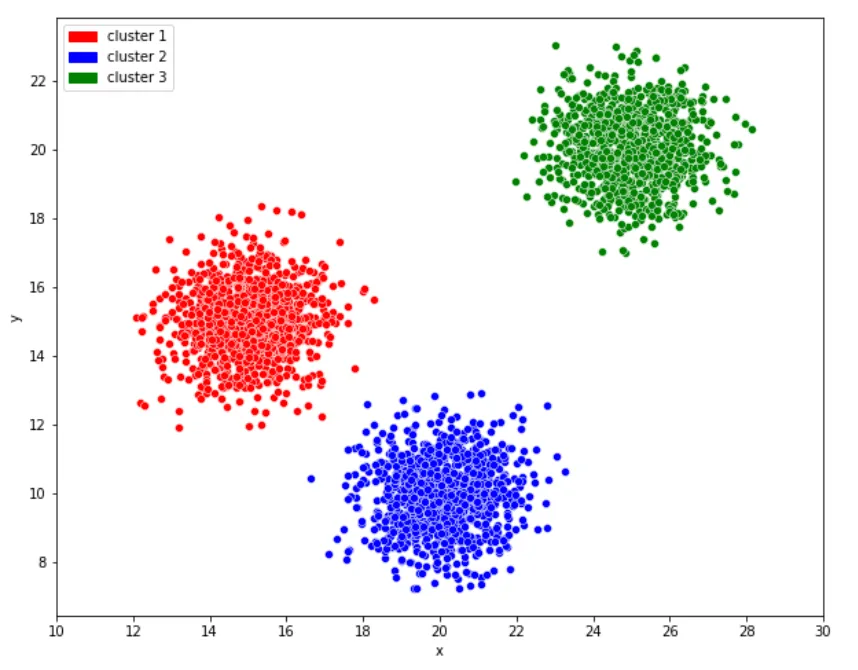

- 응집도 최대화 : 같은 군집에 속하는 데이터끼리는 최대한 비슷하도록 함
- 분리도 최대화 : 서로 다른 군집은 최대한 분리되도록 함

### 1-3. 군집화 과정

1. 피처 (데이터의 특징) 선택 또는 추출 
2. 군집화 알고리즘 선택
3. 군집 유효성 검증
4. 결과 해석

## 2. 군집화를 위한 데이터 준비

### 2-1. 군집화의 주요 고려사항

1. 변수 유형 이해
- 군집화에 사용될 피처의 종류와 특성을 명확하게 이해해야 함
- 변수가 연속형인지 명목형인지, 변수 개수에 따라 알고리즘이 달라짐
2. 거리 / 유사도 정의와 측정
- 변수 유형에 따라 적합한 거리 측정 방식에 차이가 존재함
3. 차원 축소
- 모델의 성능 향상을 위해 유사한 변수를 묶어 처리하는 차원 축소 고려

### 2-2. 변수 유형 이해

1. 연속형 변수
- 수치로 측정 가능한 변수
- 유클리디안 거리, 맨하탄 거리 사용
- k-means, 계층적 군집화
- 스케일링 필요함

2. 명목형 변수
- 범주로 구분되는 변수
- 해밍 거리, 자카드 거리
- K-modes, 계층적 군집화
- 원-핫 인코딩 또는 더미 변수 변환

3. 혼합형 변수
- 연속형과 명목형이 섞인 데이터
- k-prototypes, Gower distance 기반 계층적 군집화
- 각 변수 유형에 맞는 거리 함수를 조합하여 사용

### 2-3. 거리 / 유사도 정의와 측정

> 데이터의 거리 측정 방법

1. 유클리디안 거리

$$
d(\mathbf{x}, \mathbf{y}) = \sqrt{\sum_{i=1}^n (x_i - y_i)^2}
$$

가장 일반적인 직선거리, k-means에서 기본적으로 사용

2. 맨하탄 거리

$$
d(\mathbf{x}, \mathbf{y}) = \sum_{i=1}^n |x_i - y_i|
$$

각 차원의 차이의 절댓값의 합, 이상치에 덜 민감

3. 코사인 유사도

$$
\text{similarity} = \frac{\mathbf{x} \cdot \mathbf{y}}{||\mathbf{x}|| \times ||\mathbf{y}||}
$$

벡터 간의 각도를 측정, 텍스트 데이터나 고차원 데이터에 효과적

> 6가지 연결 방법

1. Single linkage(단일 연결법/최단 연결법)

- 군집 A와 B 사이의 가장 가까운 두 점 간 거리로 군집 간 거리를 정의
- 고립된 군집을 찾느데 중점
- 이상치에 취약

2.  Complete linkage(완전 연결법/최장 연결법)

- 군집 A와 B 사이의 가장 먼 두 점 간 거리로 군집 간 거리 정의
- 군집 내부 응집성에 중점을 둔 방법
- 이상치에 취약

3. Average linkage (평균 연결법)

- 군집 A와 B의 모든 점 쌍 사이 거리의 평균
- 모이상치에 덜 민감
- 계산량이 불필요하게 많아질 수 있다는 단점

4. Centroid Method (중심 연결법)

- 각 군집의 중심점 간의 거리
- 두 군집이 결합될 때 군집의 평균은 가중평균을 통해 구함
- 덴드로그램에서 거리 축이 위에서 아래로 줄어드는 inversion 이 발생할 가능성 있음

5. Median (중앙 연결법)

- 두 군집을 합친 뒤의 중심점과 기존 군집의 중심점 간의 거리 기반
- 군집간의 거리를 두 군집 내 모든 샘플의 중앙값으로 정의
- 극단값에 영향을 덜 받지만 기하학적 구조를 파악하기는 어려운 단점을 가짐

6. Ward's Procedure (Ward 연결법)

- 군집 내 제곱합(SSE)이 증가하지 않도록 병합
- 군집 병합 후 군집 내 SSE(오차제곱합)의 증가분이 최소인 것을 선택

### 2-4. 차원 축소

> 차원의 저주

피처 공간이 너무 커서 알고리즘이 데이터를 효과적으로 훈련할 수 없는 현상     
고차원일수록 데이터 포인트 사이의 거리가 늘어나 밀도가 낮아짐

> 차원 축소

차원의 저주를 해결하기 위해 차원 축소를 수행    
차원 축소 = 변수의 개수를 줄이는 것    
고차원 데이터를 자차원 공가에 투영하면서도 핵심 정보는 지켜내도록 하는 것이 목표

1. 선형 투영 : 고차원 공간에서 저차원 고간으로 선형적으로 데이터를 투영 (주성분 분석, 특잇값 분해, 랜덤 투영)
2. 매니폴드 학습 (비선형 차원 축소): 유클리드가 거리가 아닌 데이터 포인트 사이의 곡선 거리를 고려하여 학습

> PCA 

PCA : 다차원 데이터에서 가장 정보량(분산)이 큰 방향을 찾고, 그 방향을 기준으로 데이터를 투영하여 차원을 줄이는 것

상과관계가 높은 피처들을 결합해 선형적인 상관관계가 없는 적은 수의 피처로 데이터를 표현하기를 지향함  -> 새로 파생된 성분을 주성분이라고 함

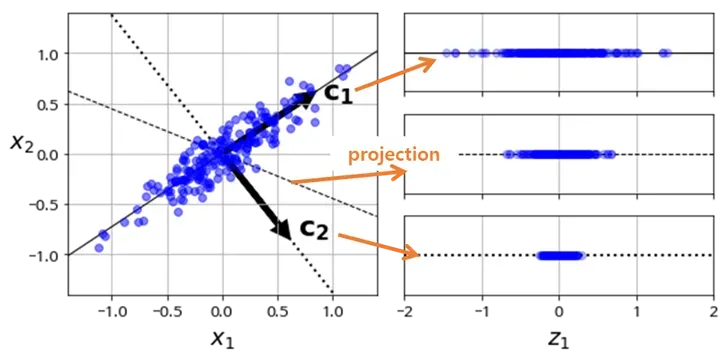

주의사항
1. 표준화 필수
2. 결측값 처리
3. 해석의 어려움
4. 정보 손실

## 3. 군집화 알고리즘

### 3-1. 계층적 군집화

계층적 군집화: 데이터의 유사성을 기반으로 트리 구조를 형성하며, 상향식 또는 하향식 방식으로 군집을 형성해 나가는 방법

계층적 군집화 알고리즘은 데이터셋의 관측치를 사용해 덴드로그램을 만듦

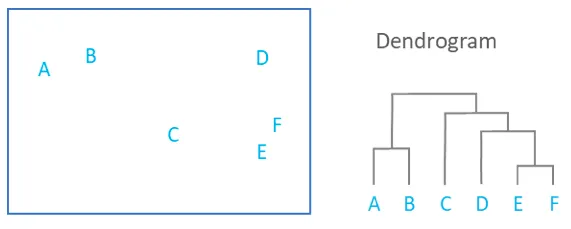

군집의 개수를 사전에 설정하지 않고, 클러스터링이 종료된 후에 원하는 군집의 개수를 선택할 수 있음

트리 구조가 상향식인지 하향식인지에 따라 응집형과 분리형으로 구분
- 상향식 : 응집형 계층적 군집화
- 하향식 : 분리형 계층적 군집화

> 응집형 클러스터링 : 먼저 각 샘플이 독립적인 클러스터가 되고, 하나의 클러스터만 남을 때까지 가까운 클러스터를 병합
1. 거리 행렬 계산
2. 단일 클러스터 시작
3. 가장 가까운 클러스터 병합
4. 거리 행렬 업데이트
5. 반복


> 분할형 클러스터링 : 전체 샘플을 포함하는 하나의 클러스터에서 시작하여, 유사성이 낮은 데이터들을 더 작은 클러스터로 분리

### 3-2. k-means

k-means : 데이터를 정해진 k개의 그룹으로 나누되, 각 그룹의 중심점과의 거리가 가장 가까운 데이터끼리 묶는 알고리즘

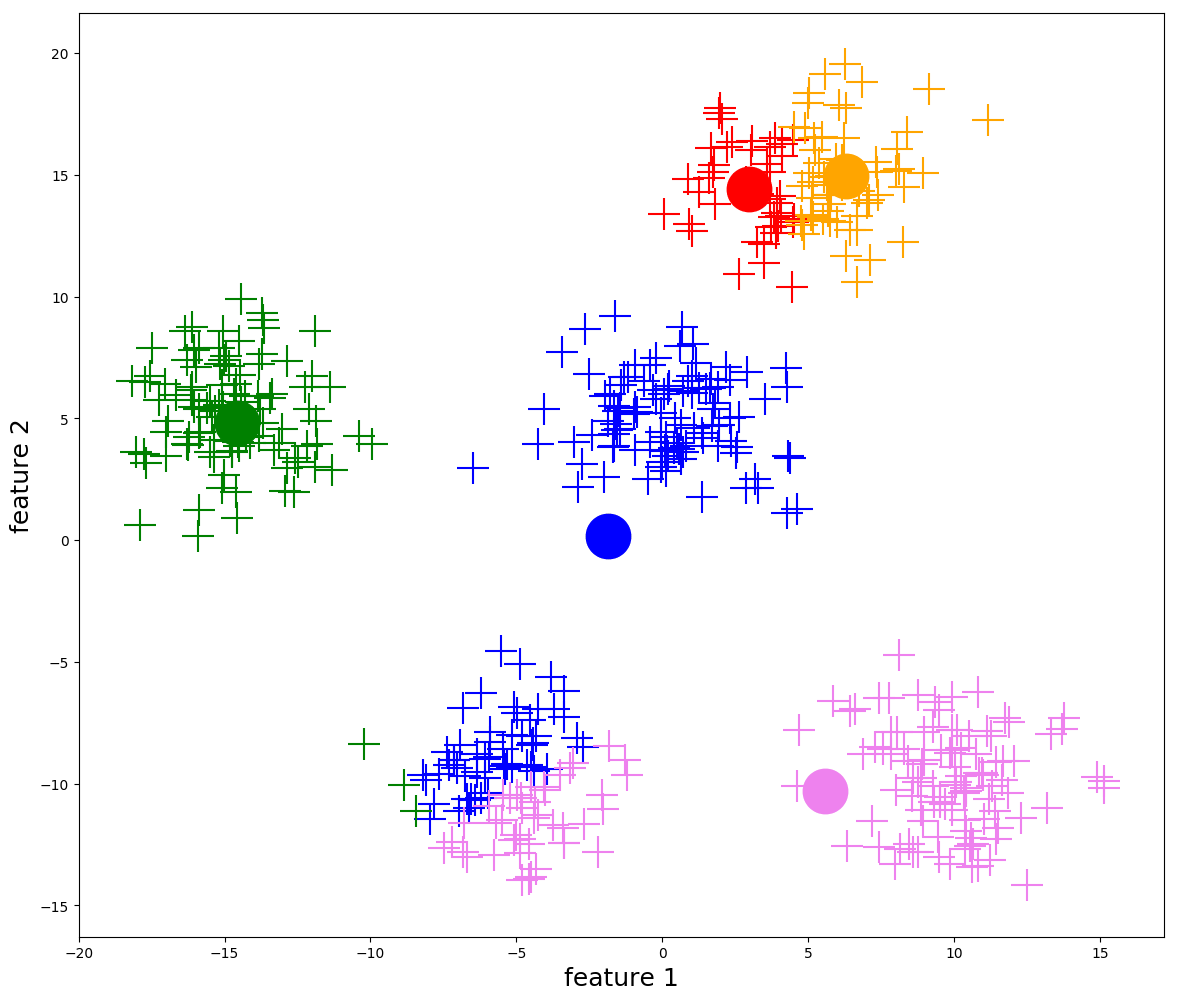

> k-means 단계

1. 데이터 표본들 중에서 랜덤하게 k개의 중심점을 초기 클러스터 중심으로 선택
2. 각 표본들을 가장 가까운 중심점에 할당
3. 각 클러스터에 할당된 표본들의 데이터 평균을 계산하게 중심점을 이동
4. 클러스터 할당이 변하지 않거나 사용자가 지정한 허용 오차 또는 최대 반복 횟수에 도달할때까지 바복

장점 : 직관적이고 구현이 쉬움, 대용량 데이터에도 적용 가능      
단점 : 초기 값에 민감함, 군집 수 결정이 어려움, 아웃라이어에 민감, 기하학적인 모양의 군집은 파악 어려움

> k-means++  알고리즘

초기 중심점들을 서로 멀리 떨어진 곳에 위치시켜 더 좋은 결과를 도출하는 방법

1. 선택한 k개의 중심점을 저장한 빈 집합 M을 초기화
2. 입력 샘플에서 첫 번째 중심점을 랜덤하게 선택 후 M에 할당
3. M에 없는 각 샘플 x에 대해 M에 있는 중심점까지의 최소 제곱 거리를 찾음
4. 다음 식과 같은 가중치가 적용된 확률 분포를 사용해 다음 중심점을 랜덤하게 선택
$$
\frac{d(\mathbf{\mu}^{(p)}, \mathbf{M})^2}{\sum_i d(\mathbf{x}^{(i)}, \mathbf{M})^2}
$$
5. k개의 중심점을 선택할 때까지 반복
6. 기본 k-means 수행

> 엘보우 방법

클래스 내 SSE를 바탕으로 그래프를 활용해 최적 클러스터 개수 k를 추정하는 방법     
-> 왜곡이 빠르게 감소하는 지점의 k값을 찾는 것

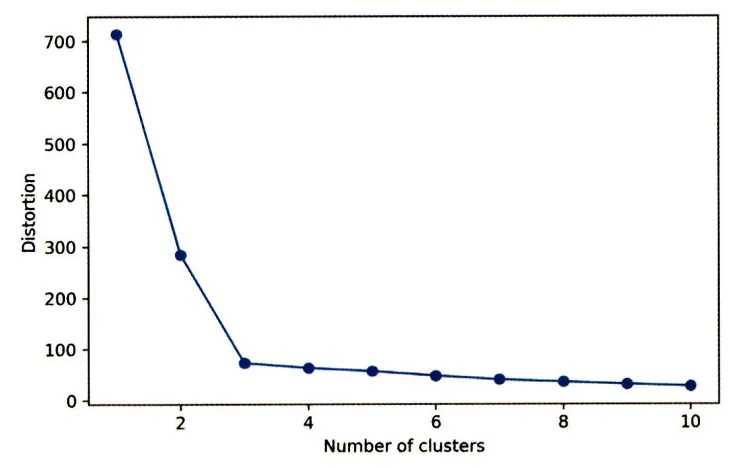

### 3-3. DBSCAN

밀도가 높은 지역의 데이터를 하나의 군집으로 묶고, 밀도 기준을 만족하지 못하는 점은 군집에 포함시키지 않는 군집화 알고리즘

1. 샘플 분류 (핵심 샘플/경계샘플/잡음샘플)
2. 클러스터 생성
3. 경계 샘플 할당     
eps: 두 포인트가 이웃이 되기 위한 포인트 사이의 최대 거리       
min_samples : 한 포인트가 군집이 되기 위한 eps 거리 내 최소 포인트 개수


장점 : 클러스터 모양을 원형으로 가정하지 않고, 밀도에 따라 클러스터를 할당, 이상치에 민감하지 않음, 잡음 샘플을 구분
단점 : eps, min sapmles에 많은 영향, 도메인 지식 필요, 연산량이 많음

> HDBSCAN

DBSCAN 을 계측정 군집화처럼 변환한 버전

1. 밀도 기반으로 1차 군집화
2. 거리 기준으로 밀도 기반 군집들을 반복적으로 연결

### 3-4. Gaussuan Mixture Model (GMM)

데이터가 여러 다른 모양의 가우시안 분포로 구성되었다고 가정하고, 각 분포를 클러스터로 인식하는 군집화 방법

- 모델 기반 군집화 방법
- 각 군집을 확률 분포로 간주
- 전체 데이터 분포를 여러 확률 분포의 혼합으로 모델링
- 데이터의 생성 메커니즘까지 모델링 가능

기본 가정
- 관측데이터: 특정 가우시안 확률 분포에 의해 생성
- 전체 데이터셋: 여러개의 다변량 가우시안 분포가 섞여있음
- 개별 데이터: 우도에 따라 K개의 가우시안 분포중 하나에 속함

1. 주어진 전체 데이터셋의 분포를 확인
2. 전체 데이터 셋은 서로 다른 정규 분포 형태의 확률 분포 곡선으로 구성되어 있다고 가정
3. 전체 데이터셋을 구성하는 여러 개의 정규분포 곡선 추출, 개별 데이터가 이 중 어떤 정규분포에 속하는지 결정. 이때 각각의 분포가 하나의 군집이 됨.

기댓값 - 최대화 (EM) 알고리즘을 사용해서 모델 파라미터를 추정      
추정 가능한 요소 : 각 군집의 중심, 모양, 크기, 방향

장점 : k-means 보다 유연하게 적용 가능        
단점 : 군집화를 위한 수행시간이 오래 걸림, 가정한 분포에 맞지 않는 데이터일 경우 성능 저하

### 4. 군집화 평가 방법

### 4-1. 외부 평가와 내부 평가

1. 외부 평가
- 데이터에 정답 레이블이 존재하는 경우에 사용
- 군집화 결과와 실제 레이블의 정답을 비교하여 평가
2. 내부 평가
- 정답 레이블이 존재하지 않는 경우
- 군집 내부 응집도와 군집 간 분리도를 기반으로 군집의 품질을 측정
- 각 알고리즘 자체 내부 평가 지표가 있고, 범용적 내부 평가 지표도 있음 (실루엣 계수, 던 지수)


### 4-2. 실루엣 계수

클러스터 내 샘플들이 얼마나 조밀하게 모여있는지 측정

$$
s^{(i)} = \frac{b^{(i)} - a^{(i)}}{\max \left\{ b^{(i)}, a^{(i)} \right\}}
$$

- 분리도가 응집도보다 큰 경우, 1에 가까워짐 (이상적)    
- 분리도가 응집도와 같을 경우, 0이 됨 -> 군집간 거리가 모호
- 분리도가 응집도보다 작은 경우, -1에 가까워짐 ---> 군집화가 잘 되지 않았다고 평가

### 4-3. 던 지수

클러스터 간 분리도와 클러스터 내 응집도의 비율을 계산해 품질을 평가하는 지표

$$
\text{Dunn Index} = \frac{
\min\limits_{i \ne j} \; d(C_i, C_j)}{\max\limits_{1 \le k \le K} \; \delta(C_k)}
$$

- 던 지수 값이 클수록 좋은 군집화 의미 -> 분리도가 높고, 응집도 높음
- 일반적으로 0 이상이며, 무한대까지 가능
- 실루엣 계수와 종합적 평가 권장
